### 목표 : 부족한 피처를 조합 생성하여 모델 성능 향상
- 특성공학 => 피처 추출/선택/생성
- 비선형의 데이터에 대한 피처 생성 => 곡선형태의 회귀선 수식
- 모 듈 : sklearn.preprocessing내에 포함
- 데이터 : fish.csv
- 피 처 : Perch의 Length, Height, Width
- 타 겟 : Perch의 Weight
- 학습유형 : 지도학습 

[1] 전처리 피처 조합 생성

In [4]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# 인스턴스 생성
poly = PolynomialFeatures()  # include_bias = False로 설정하면 밑에서 1이 빠진다.

In [6]:
poly.fit([[2, 3]])  # 넣을 때 2차원으로 줘야 한다.

PolynomialFeatures()

In [7]:
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [8]:
poly = PolynomialFeatures(include_bias = False, degree = 5)
poly.fit([[2, 3]])

PolynomialFeatures(degree=5, include_bias=False)

In [9]:
poly.transform([[2, 3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

[2] Perch 데이터를 최대한 만족하는 회귀선을 찾기

[2-1] 모듈 로딩 및 데이터 준비 <hr>

In [11]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# 데이터 준비
data_file = '../DATA/fish.csv'

In [13]:
dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [14]:
# 불필요한 컬럼 제거
dataDF.drop('Diagonal', axis = 'columns', inplace = True)
dataDF.head(2)

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.52,4.0200
1,Bream,290.0,26.3,12.48,4.3056


In [15]:
# Perch행만 추출
perchDF = dataDF[dataDF.Species == 'Perch']
perchDF.head(1)

,Species,Weight,Length,Height,Width
72,Perch,5.9,8.4,2.112,1.408


In [16]:
# 행인덱스 초기화
perchDF.reset_index(drop = True, inplace = True)
perchDF.head(2)

,Species,Weight,Length,Height,Width
0,Perch,5.9,8.4,2.112,1.4080
1,Perch,32.0,13.7,3.528,1.9992


[2-2] 데이터 확인 <hr>
- 학습 유형 결정위한 단계
- 피처 스케일링 진행 여부 체크

In [17]:
featureDF = perchDF[perchDF.columns[2:]]
targetDF = perchDF['Weight']

In [18]:
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx + 1)
        plt.scatter(df[target], df[features[idx]], label = f'corr : {corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()

In [19]:
corrList = dataDF.corr(numeric_only = True)['Weight'].to_list()
corrList[1:]

[0.9186177013642219, 0.7243453291993318, 0.8865066052433448]

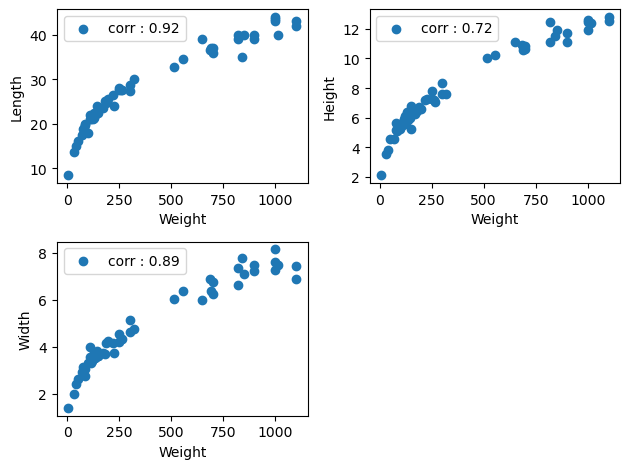

In [20]:
print_feature(2, 2, perchDF, 'Weight', perchDF.columns[2:], corrList[1:])

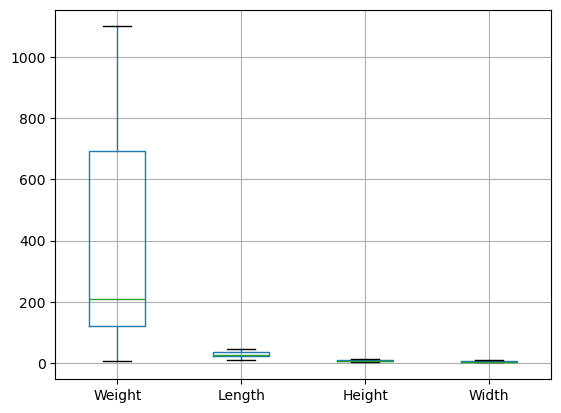

In [21]:
perchDF.boxplot()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

- LinearRegression 학습

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# scaler에 따른 점수 반환 함수
def score_return(feature, target, my_scaler, model = LinearRegression(), df = dataDF, test_size = 0.3, random_state = 42):
    featureDF = df[feature]
    targetDF = df[target] 
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = test_size, random_state = random_state)
    my_scaler.fit(X_train)
    scaled_X_train = my_scaler.transform(X_train)
    scaled_X_test = my_scaler.transform(X_test)
    
    model.fit(scaled_X_train, y_train)
    return round(model.score(scaled_X_train, y_train), 2), round(model.score(scaled_X_test, y_test), 2)

In [25]:
def main():
    for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
        train_score = score_return(perchDF.columns[2:], perchDF.columns[1], scaler)[0]
        test_score = score_return(perchDF.columns[2:], perchDF.columns[1], scaler)[1]
        print(f'{scaler} => Train Score : {train_score} --- Test Score : {test_score}\n')
main()

StandardScaler() => Train Score : 0.89 --- Test Score : 0.86

MinMaxScaler() => Train Score : 0.89 --- Test Score : 0.86

RobustScaler() => Train Score : 0.89 --- Test Score : 0.86



- PolynomialFeatures를 활용한 LinearRegression 학습

In [26]:
poly = PolynomialFeatures(include_bias = False, degree = 2)
poly.fit(perchDF[perchDF.columns[2:]])
poly_data = poly.transform(perchDF[perchDF.columns[2:]])

In [27]:
poly_data.shape

(56, 9)

In [28]:
poly_feature_names = poly.get_feature_names_out(perchDF.columns[2:])
poly_feature_names

array(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [29]:
new_perchDF = pd.DataFrame(poly_data, columns = poly_feature_names)
new_perchDF.head()

,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,8.4,2.1120,1.4080,70.56,17.74080,11.82720,4.460544,2.973696,1.982464
1,13.7,3.5280,1.9992,187.69,48.33360,27.38904,12.446784,7.053178,3.996801
2,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
3,16.2,4.5924,2.6316,262.44,74.39688,42.63192,21.090138,12.085360,6.925319
4,17.4,4.5880,2.9415,302.76,79.83120,51.18210,21.049744,13.495602,8.652422


In [30]:
pd.concat([new_perchDF, targetDF], axis = 1)

,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2,Weight
0,8.4,2.1120,1.4080,70.56,17.74080,11.82720,4.460544,2.973696,1.982464,5.9
1,13.7,3.5280,1.9992,187.69,48.33360,27.38904,12.446784,7.053178,3.996801,32.0
2,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624,40.0
3,16.2,4.5924,2.6316,262.44,74.39688,42.63192,21.090138,12.085360,6.925319,51.5
4,17.4,4.5880,2.9415,302.76,79.83120,51.18210,21.049744,13.495602,8.652422,70.0
5,18.0,5.2224,3.3216,324.00,94.00320,59.78880,27.273462,17.346724,11.033027,100.0
6,18.7,5.1992,3.1234,349.69,97.22504,58.40758,27.031681,16.239181,9.755628,78.0
7,19.0,5.6358,3.0502,361.00,107.08020,57.95380,31.762242,17.190317,9.303720,80.0
8,19.6,5.1376,3.0368,384.16,100.69696,59.52128,26.394934,15.601864,9.222154,85.0
9,20.0,5.0820,2.7720,400.00,101.64000,55.44000,25.826724,14.087304,7.683984,85.0


In [31]:
poly = PolynomialFeatures(include_bias = False, degree = 2)
poly.fit(perchDF[perchDF.columns[2:]])
poly_data = poly.transform(perchDF[perchDF.columns[2:]])

poly_feature_names = poly.get_feature_names_out(perchDF.columns[2:])
poly_feature_names

new_perchDF = pd.DataFrame(poly_data, columns = poly_feature_names)
new_perchDF.head()

,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,8.4,2.1120,1.4080,70.56,17.74080,11.82720,4.460544,2.973696,1.982464
1,13.7,3.5280,1.9992,187.69,48.33360,27.38904,12.446784,7.053178,3.996801
2,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
3,16.2,4.5924,2.6316,262.44,74.39688,42.63192,21.090138,12.085360,6.925319
4,17.4,4.5880,2.9415,302.76,79.83120,51.18210,21.049744,13.495602,8.652422


In [32]:
# scaler에 따른 점수 반환 함수
def score_return(feature, target, my_scaler, degree, model = LinearRegression(), df = perchDF, test_size = 0.2, random_state = 42):
    poly = PolynomialFeatures(include_bias = False, degree = degree)
    poly.fit(df[feature])  # fit에 넣을 데이터는 2차원이어야 한다.
    poly_data = poly.transform(df[feature])
    poly_feature_names = poly.get_feature_names_out(feature)
    new_df = pd.DataFrame(poly_data, columns = poly_feature_names)
    new_df = pd.concat([new_df, df[target]], axis = 1)
    featureDF = new_df[feature[:-1]]
    targetDF = new_df[target] 
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size = test_size, random_state = random_state)
    my_scaler.fit(X_train)
    scaled_X_train = my_scaler.transform(X_train)
    scaled_X_test = my_scaler.transform(X_test)

    model.fit(scaled_X_train, y_train)
    return round(model.score(scaled_X_train, y_train), 2), round(model.score(scaled_X_test, y_test), 2)

In [33]:
score_return(perchDF.columns[2:], 'Weight', StandardScaler(), 2)

(0.95, 0.88)

In [34]:
def main(start_degree, end_degree):
    degree_list = list(range(start_degree, end_degree + 1))
    for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
        for degree in degree_list:
            train_score = score_return(perchDF.columns[2:], 'Weight', scaler, degree)[0]
            test_score = score_return(perchDF.columns[2:], 'Weight', scaler, degree)[1]
            print(f'degree가 {degree}일 때 ===>\n')
            print(f'{scaler} => Train Score : {train_score} --- Test Score : {test_score}\n')

main(2, 4)

degree가 2일 때 ===>

StandardScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 3일 때 ===>

StandardScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 4일 때 ===>

StandardScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 2일 때 ===>

MinMaxScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 3일 때 ===>

MinMaxScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 4일 때 ===>

MinMaxScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 2일 때 ===>

RobustScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 3일 때 ===>

RobustScaler() => Train Score : 0.95 --- Test Score : 0.88

degree가 4일 때 ===>

RobustScaler() => Train Score : 0.95 --- Test Score : 0.88

